# CPS600 - Python Programming for Finance 
###  
<img src="https://www.syracuse.edu/wp-content/themes/g6-carbon/img/syracuse-university-seal.svg?ver=6.3.9" style="width: 200px;"/>

## More Math Tools

###  October 30, 2018

**Mathematical Tools**

Today we will look at some advance mathematical tools that have been graciously implemented for us by gods of Python. These include:

* Approximation: Regression and interpolation
* Convex optimization
* Integration
* Symbolic mathematics


For those who are keeping track, we are following Chapter $9$ of *Python for Finance*.

**Approximation**

There are a couple of different ways we'll look at *approximating* a function. First, let's start with the thing we'll try to approximate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Defining a special kind of function we'll play with later.

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

A fixed interval is defined via the linspace function. `np.linspace(start, stop, num)` returns `num` points beginning with `start` and ending with `stop`, with the subintervals between two consecutive points being evenly spaced.

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)
print('Number of points=', len(x))
x

Number of points= 50


array([-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913,
       -5.00090259, -4.74444605, -4.48798951, -4.23153296, -3.97507642,
       -3.71861988, -3.46216333, -3.20570679, -2.94925025, -2.6927937 ,
       -2.43633716, -2.17988062, -1.92342407, -1.66696753, -1.41051099,
       -1.15405444, -0.8975979 , -0.64114136, -0.38468481, -0.12822827,
        0.12822827,  0.38468481,  0.64114136,  0.8975979 ,  1.15405444,
        1.41051099,  1.66696753,  1.92342407,  2.17988062,  2.43633716,
        2.6927937 ,  2.94925025,  3.20570679,  3.46216333,  3.71861988,
        3.97507642,  4.23153296,  4.48798951,  4.74444605,  5.00090259,
        5.25735913,  5.51381568,  5.77027222,  6.02672876,  6.28318531])

Now, let's take a look at that special function we just defined.

Text(0.5, 1.0, 'Example function plot')

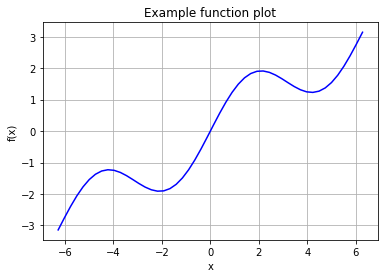

In [4]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Example function plot")

**Regression**

In regression, which we saw last week for the first (or second) time, we are finding the best $\color{blue}{parameters}$ to fit the data

$\Large{\displaystyle\min_{\alpha_1,...,\alpha_D} \frac{1}{I} \displaystyle\sum_{i = 1}^{I} (y_i - \displaystyle\sum_{d = 1}^{D} \color{blue}{\alpha}_{d} \cdot b_d (x_i ))^2}$

*Minimization problem of regression*

It is fundamentally an optimization problem. The *indexing set* $I$ above is running over all of the *observations* or *datapoints*, whereas the index $d$ refers to the *features* or *basis functions* of the *input/predictive/independent* variable.

**Monomials as Basis Functions**

One of the simplest cases is to take monomials as basis functions, e.g.

$$b_1 = 1$$
$$b_2 = x$$
$$b_3 = x^2$$
$$b_4 = x^3$$

...and so on

NumPy has built-in functions `polyfit` for the determination of the optimal parameters $\alpha$.
* `x`       x coordinates (independent variable values)
* `y`       y coordinates (dependent variable values)
* `deg`     degree of the fitting polynomial
* `polyval` for the evaluation of the approximation given a set of input values


Let's fit our special function with a straight line.

In [5]:
reg = np.polyfit(x, f(x), deg=1)    # linear regression
ry = np.polyval(reg, x)             # regression estimates 

In [6]:
print('Alpha:', reg)
print(ry)

Alpha: [ 4.28841952e-01 -1.40254456e-16]
[-2.69449345 -2.58451412 -2.4745348  -2.36455548 -2.25457615 -2.14459683
 -2.0346175  -1.92463818 -1.81465885 -1.70467953 -1.5947002  -1.48472088
 -1.37474156 -1.26476223 -1.15478291 -1.04480358 -0.93482426 -0.82484493
 -0.71486561 -0.60488628 -0.49490696 -0.38492764 -0.27494831 -0.16496899
 -0.05498966  0.05498966  0.16496899  0.27494831  0.38492764  0.49490696
  0.60488628  0.71486561  0.82484493  0.93482426  1.04480358  1.15478291
  1.26476223  1.37474156  1.48472088  1.5947002   1.70467953  1.81465885
  1.92463818  2.0346175   2.14459683  2.25457615  2.36455548  2.4745348
  2.58451412  2.69449345]


And look at the results.

Text(0.5, 1.0, 'Example function and linear regression')

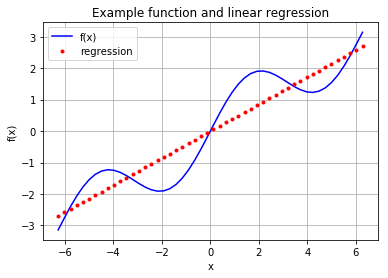

In [7]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Example function and linear regression")

Doing the same, but this time with monomials up to degree $5$.

In [8]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

In [9]:
print('Alpha:',reg)

Alpha: [ 1.37920761e-03 -2.46674444e-18 -6.82525072e-02  2.76262507e-17
  1.11425209e+00 -1.21874773e-16]


Text(0.5, 1.0, 'Regression with monomials up to order 5')

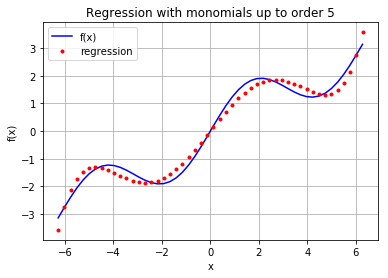

In [10]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Regression with monomials up to order 5")

Again, this time with degree $7$.

In [11]:
# take monomials up to order 7 to approximate the example function

reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)

Text(0.5, 1.0, 'Regression with monomials up to order 7')

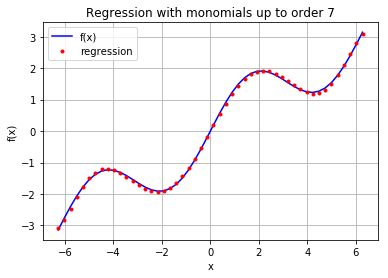

In [12]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Regression with monomials up to order 7")

A brief check reveals that the result is not perfect:

In [13]:
np.allclose(f(x), ry)

False

But he mean squared error (MSE) is not too large


In [14]:
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517595

**Individual Basis Functions**

You can reach better regression results when you can choose better sets of basis functions. The individual basis functions have to be defined via a matrix approach (i.e., using a NumPy  ndarray object). First, the case with monomials up to order $3$ (note that we are not really getting an improvement here because this is just a subset of the basis functions we already tried):


In [15]:
matrix = np.zeros((3 + 1, len(x)))    # len(x) = 50
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [16]:
print('Shape:',matrix.shape)
print('Size:',matrix.size)
matrix

Shape: (4, 50)
Size: 200


array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [-6.28

The sublibrary `numpy.linalg` provides the function `lstsq` to solve least-squares optimization problems


In [17]:
reg = np.linalg.lstsq(matrix.T, f(x),rcond=None)[0]

In [18]:
np.linalg.lstsq(matrix.T, f(x),rcond=None)

(array([ 1.50654604e-14,  5.62777448e-01, -1.11022302e-15, -5.43553615e-03]),
 array([18.70019638]),
 4,
 array([703.78757296, 130.00970131,  10.44694523,   4.7085911 ]))

In [19]:
print("regression parameters:",reg)        # optimal parameters for the single basis functions:
print("regression shape:", reg.shape)
print ("matrix shape:", matrix.shape)

regression parameters: [ 1.50654604e-14  5.62777448e-01 -1.11022302e-15 -5.43553615e-03]
regression shape: (4,)
matrix shape: (4, 50)


 To get the regression estimates we apply the dot function to the reg and matrix arrays. `np.dot(a, b)` simply gives the dot product for the two arrays a and b:


In [20]:
ry = np.dot(reg, matrix)

Alternatively, we can use `matmul`:

In [21]:
rz = np.matmul(reg, matrix)

See, it's the same:

In [22]:
np.allclose(rz,ry)

True

Having a look at it:

Text(0.5, 1.0, 'Regression via least-squares function')

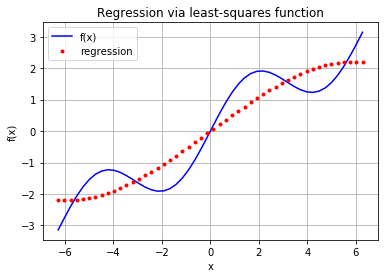

In [23]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Regression via least-squares function")
#    The result is not really as good as expected

Now let's use our knowledge of the sine-wavey nature of the example function.

In [24]:
matrix[3, :] = np.sin(x) #Replacing the highest-degree monomial
reg = np.linalg.lstsq(matrix.T, f(x),rcond=None)[0]
ry = np.dot(reg, matrix)

Having a look...

In [25]:
reg

array([4.2004068e-16, 5.0000000e-01, 0.0000000e+00, 1.0000000e+00])

Text(0.5, 1.0, 'Regression using individual functions')

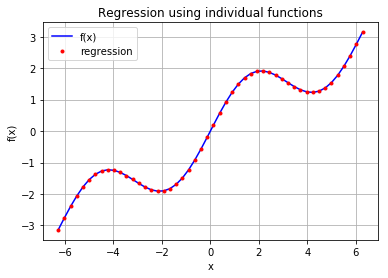

In [26]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Regression using individual functions")

<img src="https://media1.tenor.com/images/24168fdb3087be9a171f5b33439b25ba/tenor.gif" style="width: 200px;"/>




The regression now is “perfect” in a numerical sense:

In [27]:
np.allclose(f(x), ry)

True

The mean squared error (*MSE*) is close to $0$.

In [28]:
np.sum((f(x) - ry) ** 2) / len(x)

3.345571424993955e-31

In fact, the minimization routine recovers the correct parameters of $1$ for the `sin` part and $0.5$ for the linear part:

`np.sin(x) + 0.5 * x`


In [29]:
reg

array([4.2004068e-16, 5.0000000e-01, 0.0000000e+00, 1.0000000e+00])

**Noisy Data**

Regression can cope equally well with noisy data, be it data from simulation or from (nonperfect) measurements


In [30]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn)) # Adding Gaussian noise
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [31]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

Text(0.5, 1.0, 'Regression with noisy data')

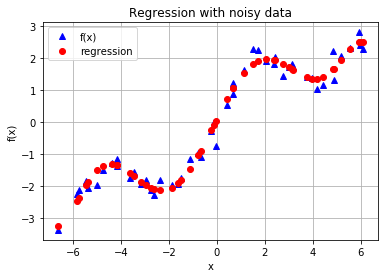

In [32]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Regression with noisy data")

**Unsorted Data**

Regression  also works seamlessly with unsorted datalet us randomize the independent data points.


In [33]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

Inspecting the raw data *visually* but not *graphically*:

In [34]:
print (xu[:10].round(2))
print (yu[:10].round(2))

[ 1.89  4.97  4.9   5.11 -1.21 -4.47  1.83 -0.97  3.88 -3.58]
[ 1.89  1.52  1.47  1.64 -1.54 -1.26  1.88 -1.31  1.27 -1.37]


Take monomials up to the order of $5$ as basis functions...

In [35]:
reg = np.polyfit(xu, yu, 5) 
ry = np.polyval(reg, xu)

Text(0.5, 1.0, 'Regression with unsorted data')

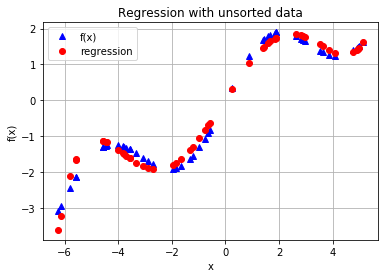

In [36]:
plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Regression with unsorted data")

If this example confuses you, then just forget about it. The point is that the regression algorithm doesn't care about the order in which the observations appear - as you can easily tell by looking at it as an optimization problem. Recall:

$\Large{\displaystyle\min_{\alpha_1,...,\alpha_D} \frac{1}{I} \displaystyle\sum_{i = 1}^{I} (y_i - \displaystyle\sum_{d = 1}^{D} \color{blue}{\alpha}_{d} \cdot b_d (x_i ))^2}$


**Multiple Dimensions**

Univariate models are great, but the world is lots more complicated than that. Happily, we can use basically the same methods to do linear regression on multivariate data (inputs and outputs).

Let's define another function to generate $2D$ data.

In [166]:
def fm(x, y):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

We're meeting a new `numpy` utility here called `meshgrid`. It's really handy because you don't want to do this yourself.

In [167]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)     # generates 2-d grids out of the 1-d arrays
Z = fm(X, Y)                 # dependent data points

In [174]:
Z

array([[ 0.        ,  0.6339301 ,  1.13188751,  1.39470362,  1.38685613,
         1.14608395,  0.77317232,  0.40467303,  0.17594355,  0.18450949,
         0.46366711,  0.9734709 ,  1.61154576,  2.24079713,  2.72651873,
         2.97285383,  2.9487411 ,  2.69632201,  2.3195343 ,  1.95597889],
       [ 0.73932667,  1.37325677,  1.87121418,  2.13403029,  2.12618279,
         1.88541061,  1.51249899,  1.1439997 ,  0.91527021,  0.92383615,
         1.20299377,  1.71279756,  2.35087242,  2.9801238 ,  3.46584539,
         3.7121805 ,  3.68806777,  3.43564867,  3.05886096,  2.69530555],
       [ 1.08138001,  1.71531012,  2.21326753,  2.47608364,  2.46823614,
         2.22746396,  1.85455234,  1.48605305,  1.25732356,  1.2658895 ,
         1.54504712,  2.05485091,  2.69292577,  3.32217715,  3.80789874,
         4.05423385,  4.03012112,  3.77770202,  3.40091431,  3.0373589 ],
       [ 1.38121546,  2.01514557,  2.51310298,  2.77591909,  2.76807159,
         2.52729941,  2.15438779,  1.7858885 ,  

In [177]:
X

array([[ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  

In [175]:
fm(x, y)

array([ 0.        ,  1.37325677,  2.21326753,  2.77591909,  3.05941528,
        3.11455854,  3.04883391,  3.00277313,  3.11432684,  3.4828219 ,
        4.142866  ,  5.05550369,  6.11912904,  7.19725917,  8.15568374,
        8.89895476,  9.39635247,  9.6903073 ,  9.88500398, 10.11825655])

In [176]:
Z.diagonal()

array([ 0.        ,  1.37325677,  2.21326753,  2.77591909,  3.05941528,
        3.11455854,  3.04883391,  3.00277313,  3.11432684,  3.4828219 ,
        4.142866  ,  5.05550369,  6.11912904,  7.19725917,  8.15568374,
        8.89895476,  9.39635247,  9.6903073 ,  9.88500398, 10.11825655])

In [168]:
Z.shape

(20, 20)

In [146]:
type(Z)

numpy.ndarray

In [91]:
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

Let's take a look at what we've got here:

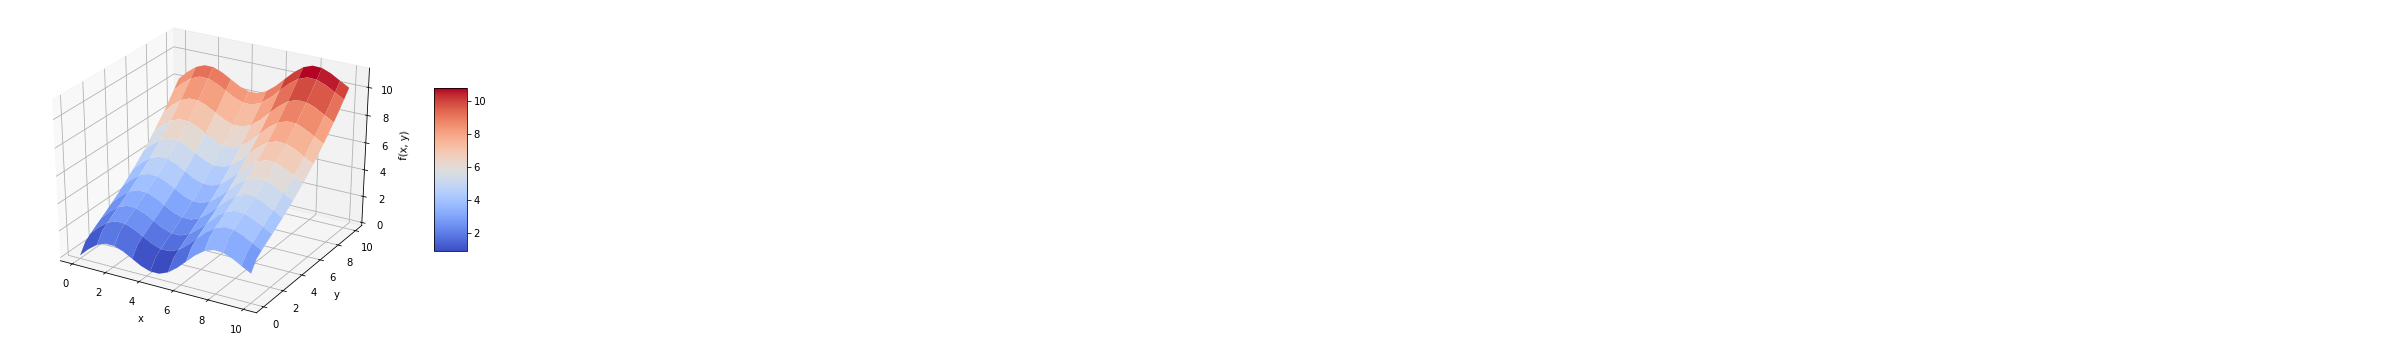

In [92]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, 
       linewidth=0.5, antialiased=True)
#  X, Y, Z - data values as 2D arrays
#  stride, cstride - array row and column stride (step size)
#  cmap - a color map for surface pathes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
# title: Function with two parameters

Now, manually, let's create some basis functions. It's really got the same exact structure - it's an array.

To get good regression results we compile a set of basis functions, including both a `sin` and a `sqrt` function, which leverages our knowledge of the example function:

In [169]:
matrix = np.zeros((len(x), 9 + 1))
matrix[:, 9] = x * y
matrix[:, 8] = np.sqrt(y)
matrix[:, 7] = np.sin(x)
matrix[:, 6] = x ** 3
matrix[:, 5] = y ** 3
matrix[:, 4] = x ** 2
matrix[:, 3] = y ** 2
matrix[:, 2] = x
matrix[:, 1] = y
matrix[:, 0] = 1

This time we'll use `statsmodels`. The `OLS` provided by it works for both univariate and multivariate regressions.

In [148]:
import statsmodels.api as sm

More [here](http://statsmodels.sourceforge.net/stable/generated/statsmodels.regression.linear_model.OLS.html).

In [172]:
xx = fm(x,y)

In [173]:
sm.OLS(xx, matrix).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.906e+26
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          9.59e-184
Time:                        20:47:33   Log-Likelihood:                 555.01
No. Observations:                  20   AIC:                            -1098.
Df Residuals:                      14   BIC:                            -1092.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.184e-14   2.56e-13     -0.124      0.903   -5.81e-13    5.17e-13
x1             0.1250   4.19e-13   2.98e+11      0.000       0.125       0.125
x2             0.1250   4.19e-13   2.98e+11      0.000       0.125       0.125
x3             0.0167   3.62e-14   4.61e+11      0.000       0.017       0.017
x4             0.0167   3.62e-14   4.61e+11      0.000       0.017       0.017
x5         -9.649e-15   2.84e-15     -3.393      0.004   -1.57e-14   -3.55e-15
x6          9.536e-15   2.84e-15      3.353      0.005    3.44e-15    1.56e-14
x7             1.0000   1.28e-13   7.79e+12      0.000       1.000       1.000
x8             1.0000   1.03e-12   9.68e+11      0.000       1.000       1.000
x9             0.0167   3.62e-14   4.61e+11      0.000       0.017       0.017
==============================================================================
Omnibus:                        2.798   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.307
Skew:                           0.761   Prob(JB):                        0.316
Kurtosis:                       2.328   Cond. No.                     8.34e+33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.5e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [181]:
type(X)

numpy.ndarray

In [179]:
x = X.flatten()
y = Y.flatten()

matrix2 = np.zeros((len(x), 9 + 1))
matrix2[:, 9] = x * y
matrix2[:, 8] = np.sqrt(y)
matrix2[:, 7] = np.sin(x)
matrix2[:, 6] = x ** 3
matrix2[:, 5] = y ** 3
matrix2[:, 4] = x ** 2
matrix2[:, 3] = y ** 2
matrix2[:, 2] = x
matrix2[:, 1] = y
matrix2[:, 0] = 1

In [180]:
sm.OLS(Z.flatten(), matrix2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.588e+29
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:25:12   Log-Likelihood:                 11919.
No. Observations:                 400   AIC:                        -2.382e+04
Df Residuals:                     390   BIC:                        -2.378e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.132e-14   8.86e-15     -1.279      0.202   -2.87e-14    6.09e-15
x1          -2.22e-16   1.43e-14     -0.016      0.988   -2.83e-14    2.79e-14
x2             0.2500   4.55e-15   5.49e+13      0.000       0.250       0.250
x3             0.0500   1.87e-15   2.68e+13      0.000       0.050       0.050
x4         -1.832e-15   1.04e-15     -1.765      0.078   -3.87e-15    2.08e-16
x5         -1.119e-16   1.01e-16     -1.104      0.270   -3.11e-16    8.74e-17
x6          9.368e-17   6.72e-17      1.394      0.164   -3.84e-17    2.26e-16
x7             1.0000   2.31e-15   4.32e+14      0.000       1.000       1.000
x8             1.0000   1.86e-14   5.37e+13      0.000       1.000       1.000
x9         -2.914e-16   1.53e-16     -1.910      0.057   -5.91e-16    8.51e-18
==============================================================================
Omnibus:                       54.371   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.302
Skew:                          -0.019   Prob(JB):                     0.000784
Kurtosis:                       2.074   Cond. No.                     8.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
model = sm.OLS(fm(x, y), matrix).fit()

Here is some information about our model.

In [96]:
matrix.shape

(20, 10)

In [97]:
Z.shape

(20, 20)

In [119]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.906e+26
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          9.59e-184
Time:                        20:09:16   Log-Likelihood:                 555.01
No. Observations:                  20   AIC:                            -1098.
Df Residuals:                      14   BIC:                            -1092.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.184e-14   2.56e-13     -0.124      0.903   -5.81e-13    5.17e-13
x1             0.1250   4.19e-13   2.98e+11      0.000       0.125       0.125
x2             0.1250   4.19e-13   2.98e+11      0.000       0.125       0.125
x3             0.0167   3.62e-14   4.61e+11      0.000       0.017       0.017
x4             0.0167   3.62e-14   4.61e+11      0.000       0.017       0.017
x5         -9.649e-15   2.84e-15     -3.393      0.004   -1.57e-14   -3.55e-15
x6          9.536e-15   2.84e-15      3.353      0.005    3.44e-15    1.56e-14
x7             1.0000   1.28e-13   7.79e+12      0.000       1.000       1.000
x8             1.0000   1.03e-12   9.68e+11      0.000       1.000       1.000
x9             0.0167   3.62e-14   4.61e+11      0.000       0.017       0.017
==============================================================================
Omnibus:                        2.798   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.307
Skew:                           0.761   Prob(JB):                        0.316
Kurtosis:                       2.328   Cond. No.                     8.34e+33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.5e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The optimal regression parameters, which are stored in the `params` attribute of our model object:


In [47]:
a = model.params
a

array([-3.18356452e-14,  1.25000000e-01,  1.25000000e-01,  1.66666667e-02,
        1.66666667e-02, -9.64853197e-15,  9.53577495e-15,  1.00000000e+00,
        1.00000000e+00,  1.66666667e-02])

Here is the function we found - note the parameters are another input.

In [184]:
def reg_func(a, x, y):
    f9 = a[9] * x * y
    f8 = a[8] * np.sqrt(y)
    f7 = a[7] * np.sin(x)
    f6 = a[6] * x ** 3
    f5 = a[5] * y ** 3
    f4 = a[4] * x ** 2
    f3 = a[3] * y ** 2
    f2 = a[2] * x
    f1 = a[1] * y
    f0 = a[0] * 1
    return (f9 + f8 + f7 + f6 + f5 +
             f4 + f3 + f2 + f1 + f0)

In [185]:
RZ = reg_func(a, X, Y)

Let's see how we did.

In [183]:
RZ.shape

(20, 20)

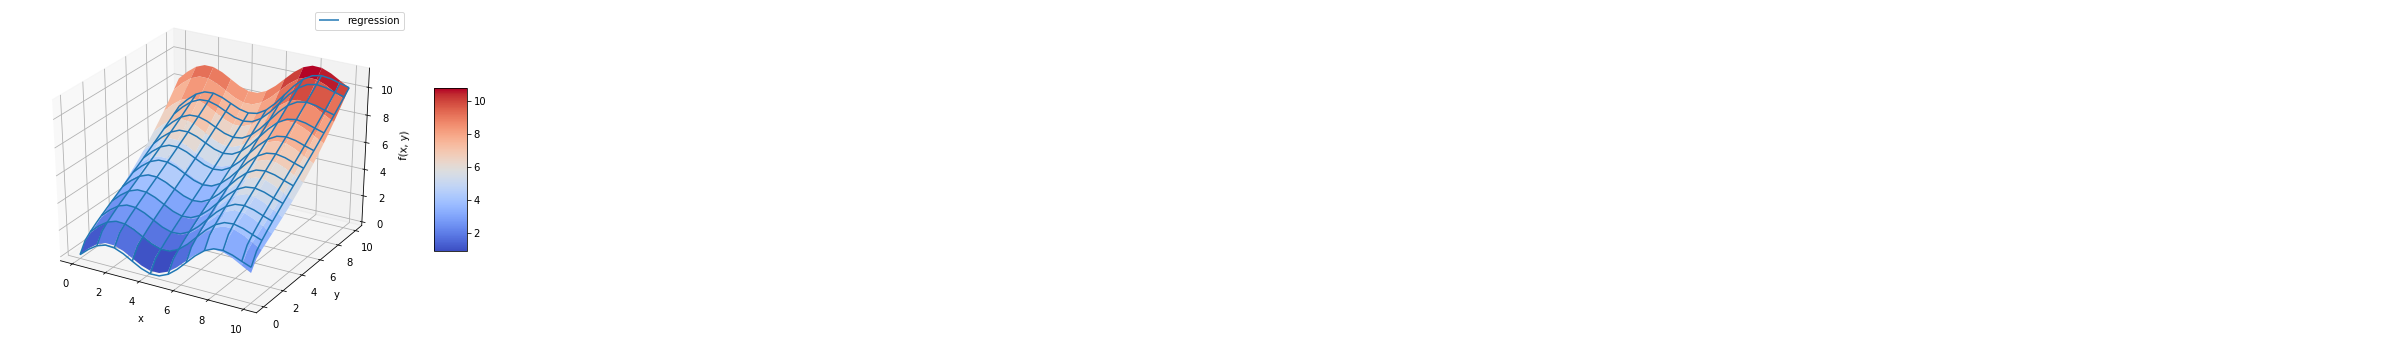

In [50]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
#  title: Higher dimension regression
# NOTE: textbook defines different regression function

Not bad.

**Interpolation**

Sometimes you want to hit exact values at certain points and then fill in the gaps smoothly. The basic idea is to do a regression between neighboring datapoints so that the functions agree at the points and are nice and smooth in between.

The `SciPy` module lets us do this.

In [51]:
import scipy.interpolate as spi

In [52]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [53]:
x

array([-6.28318531, -5.75958653, -5.23598776, -4.71238898, -4.1887902 ,
       -3.66519143, -3.14159265, -2.61799388, -2.0943951 , -1.57079633,
       -1.04719755, -0.52359878,  0.        ,  0.52359878,  1.04719755,
        1.57079633,  2.0943951 ,  2.61799388,  3.14159265,  3.66519143,
        4.1887902 ,  4.71238898,  5.23598776,  5.75958653,  6.28318531])

Same function as before.

In [54]:
def f(x):
    return np.sin(x) + 0.5 * x

In [55]:
y=f(x)

In [56]:
y

array([-3.14159265, -2.37979327, -1.75196847, -1.35619449, -1.2283697 ,
       -1.33259571, -1.57079633, -1.80899694, -1.91322295, -1.78539816,
       -1.38962418, -0.76179939,  0.        ,  0.76179939,  1.38962418,
        1.78539816,  1.91322295,  1.80899694,  1.57079633,  1.33259571,
        1.2283697 ,  1.35619449,  1.75196847,  2.37979327,  3.14159265])

In [57]:
# scipy.interpolate defines function splrep 
#    x       (Ordered) x coordinates (independent variable values)
#    y       ( x-ordered) y coordinates (dependent variable values)
#    k       Order of the spline fit ( 1 <= k <= 5)

ipo = spi.splrep(x, y, k=1)   # linear spline

This defines an interpolation fitted to our data. We can then evaluate it on the points in question.

In [58]:
# scipy.interpolate defines function splev
#   x        (Ordered) x coordinates (independent variable values)
#   tck      Sequence of length 3 returned by splrep (knots, coefficients, degree)

iy = spi.splev(x, ipo)

In [59]:
iy

array([-3.14159265, -2.37979327, -1.75196847, -1.35619449, -1.2283697 ,
       -1.33259571, -1.57079633, -1.80899694, -1.91322295, -1.78539816,
       -1.38962418, -0.76179939,  0.        ,  0.76179939,  1.38962418,
        1.78539816,  1.91322295,  1.80899694,  1.57079633,  1.33259571,
        1.2283697 ,  1.35619449,  1.75196847,  2.37979327,  3.14159265])

Text(0, 0.5, 'f(x)')

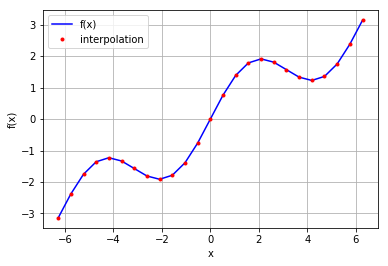

In [60]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# title: Example plot with linear interpolation

In [61]:
np.allclose(f(x), iy)

True

No surprises there.

Next, let's pick a smaller interval and look at the interpolated values in between.

In [62]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

Text(0, 0.5, 'f(x)')

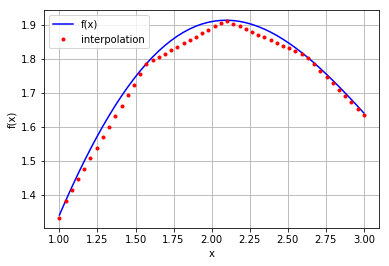

In [63]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# title: Example plot (detail) with linear interpolation

What we see here is the *linear* nature of the interpolation in between the points to which we fitted the model.

Here is an example where the the model is *cubic* in between the fitted points.

In [64]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

Text(0, 0.5, 'f(x)')

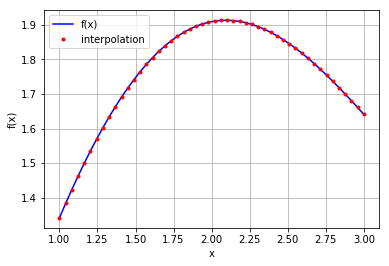

In [65]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# title: Example plot (detail) with cubic splines interpolation

Numerically, the interpolation is not perfect, but the mean squared error is really small.

In [66]:
np.allclose(f(xd), iyd), np.sum((f(xd) - iyd) ** 2) / len(xd)

(False, 1.1349319851436252e-08)

**Convex Optimization**

(Used, for example,  for calibration of option pricing models to market data)

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline


# we want to minimize the following function:

def fm(w):    # w is a tuple
    x = w[0]
    y = w[1]
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)

In [68]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

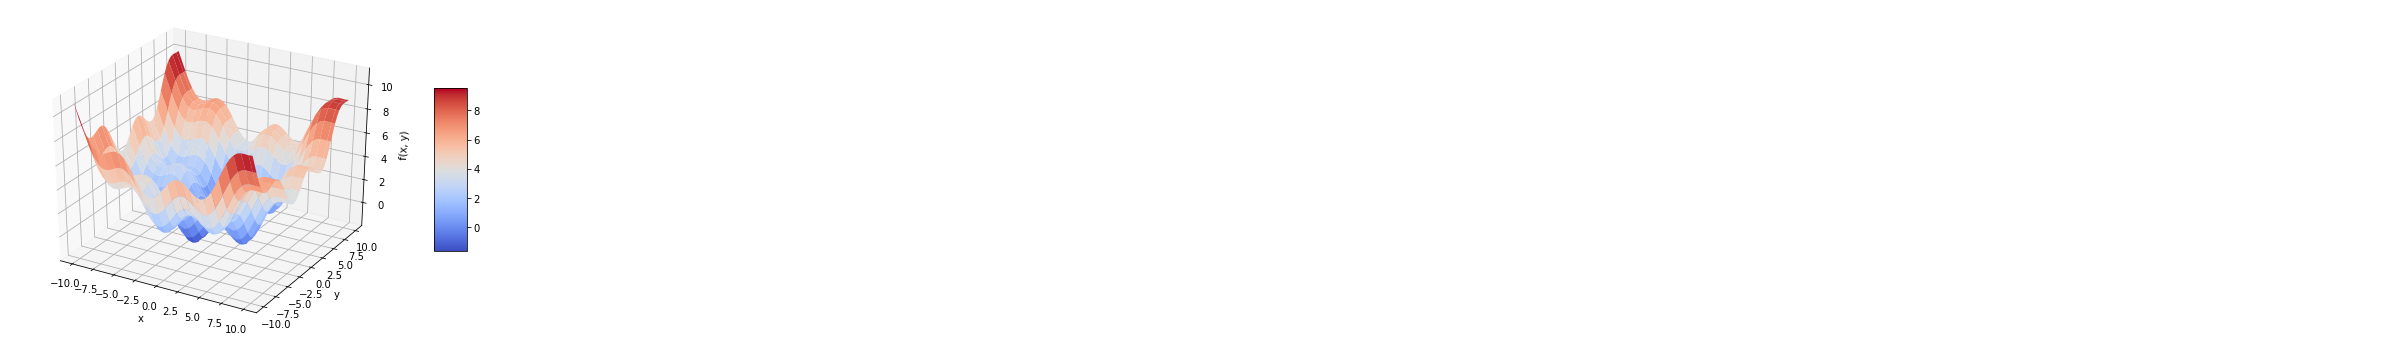

In [69]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# title: Function to minimize with two parameters

Now, we want to implement both a global minimization approach and a local one. The functions `brute` and `fmin` that we want to use can be found in the sublibrary `scipy.optimize`:

In [70]:
import scipy.optimize as spo

**Global Optimization**

We amend the original function by an option to output current parameter values as well as the function value:


In [71]:
def fo(w):
    x = w[0]
    y = w[1]
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:   # output is a global variable
        print ('%8.4f %8.4f %8.4f' % (x, y, z))
    return z

`brute` takes the parameter ranges as input. For example, providing parameter range $(-10, 10.1, 5)$ for the `x` value will lead to “tested” values of $-10, -5, 0, 5, 10$:


In [72]:
output = True
spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([0., 0.])

*Result* The first parameterization here is quite rough, in that we used steps of width $5$ for  both input parameters. 

The optimal parameter values are $x = y = 0$. The resulting function value is also $0$.

Let's be a little smarter and more patient.

In [73]:
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1        # The optimal parameter values

array([-1.4, -1.4])

*Result* The second  parameterization is better.

We used steps of width $0.1$ for  both input parameters.

The optimal parameter values are $x = y = -1.4$

The minimum function value:

In [74]:
fm(opt1)

-1.7748994599769203

**Local Optimization**

The function `fmin` takes as input the function to minimize (`fo`) and the starting parameter values (`opt1`). `xtol`, `ftol` are levels for the input parameter tolerance and the function value tolerance.

`maxiter` is the maximum number of iterations  

In [75]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

The value we found:

In [76]:
fm(opt2)

-1.7757246992239009

For many convex optimization problems it is advisable to have a global minimization before the local one. The major reason for this is that local convex optimization  algorithms can easily be trapped in a local minimum, ignoring completely “better”  local minima and/or a global minimum 


In [77]:
output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

**Constrained Optimization**

(*expected utility maximization*)

$\Large\displaystyle\max_{a,b} E(u(w_1)) = p\sqrt{w_{1u}} + (1 - p)\sqrt{w_{1d}}$

$\Large w_1 = ar_a + br_b$

$\Large w_0 \geq aq_a + bq_b$

$\Large a,b \geq 0$

As a simple example, consider the utility maximization problem of an investor 
who can invest in two risky securities. Both securities cost $q_a = q_b = 10$ today. 
After one year, they have a payoff of 
$r_a = 15 USD$ and $r_b = 5 USD$, respectively, in state $u$, and of 
$r_a = 5 USD$  and $r_b = 12 USD$, respectively, in state $d$. 
Both states are equally likely $p = 0.5$
The investor has a budget of $w_0 = 100 USD$ to invest.

$\Large\displaystyle\min_{a,b} -E(u(w_1)) = -(0.5\sqrt{w_{1u}} + 0.5\sqrt{w_{1d}})$

$\Large w_{1u} = a \cdot 15 + b \cdot 5$

$\Large w_{1d} = a \cdot 5 + b \cdot 12$

$\Large 100 \geq a \cdot 10 + b \cdot 10$

$\Large a,b \geq 0$

In [78]:
# function to be minimized
from math import sqrt
def Eu(w):
    s = w[0]
    b = w[1]
    return -(0.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))

# constraints
def cons_f (w):
    s = w[0]
    b = w[1]
    return 100 - s * 10 - b * 10

cons = ({'type': 'ineq', 'fun': cons_f})

# budget constraint
bnds = ((0, 1000), (0, 1000))  # uppper bounds large enough - why tho?

To solve this problem, we use the `scipy.optimize.minimize` function. 
This function takes as input 
*  `Eu`,  the function to be minimized 
*  equations and inequalities (as a list of `dict` objects) 
*  boundaries for the parameters (as a tuple of tuple objects)

The function returns a dict object


In [79]:
result = spo.minimize(Eu, [5, 5], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [80]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [81]:
result['x']

array([8.02547122, 1.97452878])

In [82]:
-result['fun']

9.700883611487832

The budget constraint is  binding; i.e., the investor invests his/her total wealth of $100$ USD into the securities. This is easily verified through taking the dot product of the optimal parameter vector and the price vector:


In [83]:
np.dot(result['x'], [10, 10])

99.99999999999999